#Correlation





In [68]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import scipy.stats
import pandas as pd
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
               [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

In [81]:
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

xyz.corr()

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


In [80]:
#Pearson
xyz.corr(method='spearman')

,x-values,y-values,z-values
x-values,1.000000,0.975758,-1.000000
y-values,0.975758,1.000000,-0.975758
z-values,-1.000000,-0.975758,1.000000


In [84]:
xyz.corr(method='kendall')

,x-values,y-values,z-values
x-values,1.000000,0.911111,-1.000000
y-values,0.911111,1.000000,-0.911111
z-values,-1.000000,-0.911111,1.000000


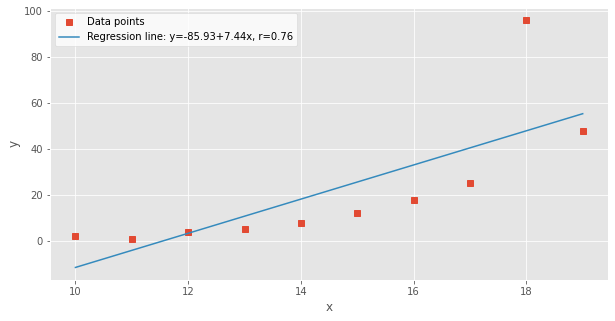

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

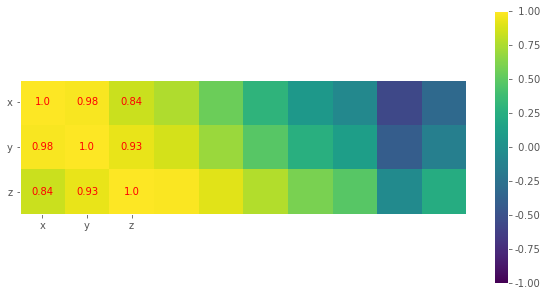

In [90]:
corr_matrix = np.corrcoef(xyz).round(decimals=2)
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

# 2B Linear Regression on Botston housing dataset


In [101]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In [94]:
bot = datasets.load_boston()

In [96]:
bot.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [98]:
df = pd.DataFrame(bot.data, columns=bot.feature_names)

In [99]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [130]:
df['MEDV'] = bot.target


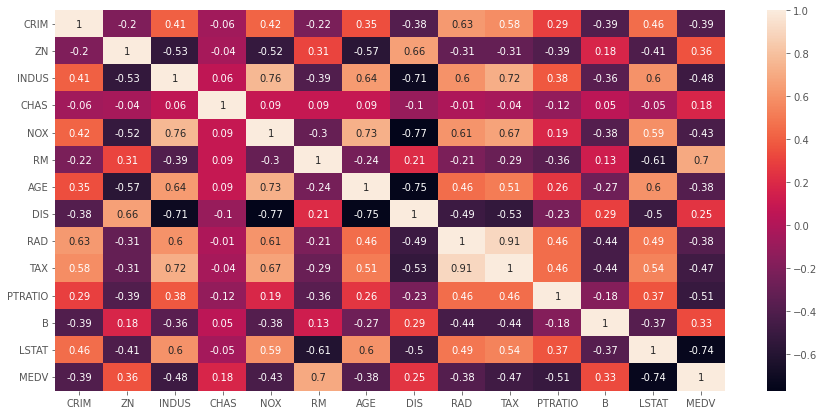

In [131]:
correlation_matrix=df.corr().round(2)
plt.figure(figsize=(15,7))
sns.heatmap(data=correlation_matrix,annot=True)

In [132]:
#Correlation with output variable
cor_target = abs(correlation_matrix[["MEDV"]])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

,MEDV
CRIM,0.39
ZN,0.36
INDUS,0.48
CHAS,NaN
NOX,0.43
RM,0.70
AGE,0.38
DIS,NaN
RAD,0.38
TAX,0.47


In [134]:
x = bot.data
y = bot.target

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=5)


# Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(xtrain, ytrain)

LinearRegression()

In [165]:
# model evaluation for training set
y_train_predict = linearreg.predict(xtrain)
mae= mean_absolute_error(ytrain,y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

y_test_predict=linearreg.predict(xtest)
mae= mean_absolute_error(ytest,y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

The model performance for training set
--------------------------------------
MAE is 3.3500095196484514


The model performance for testing set
--------------------------------------
MAE is 3.2132704958423837


